# Advanced House Price Prediction
    

In [2]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
# Information about the data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

</h1> Dimensions of the data: 1460 x 81 <h1>

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Data Visualization

# Handling missing values - 1

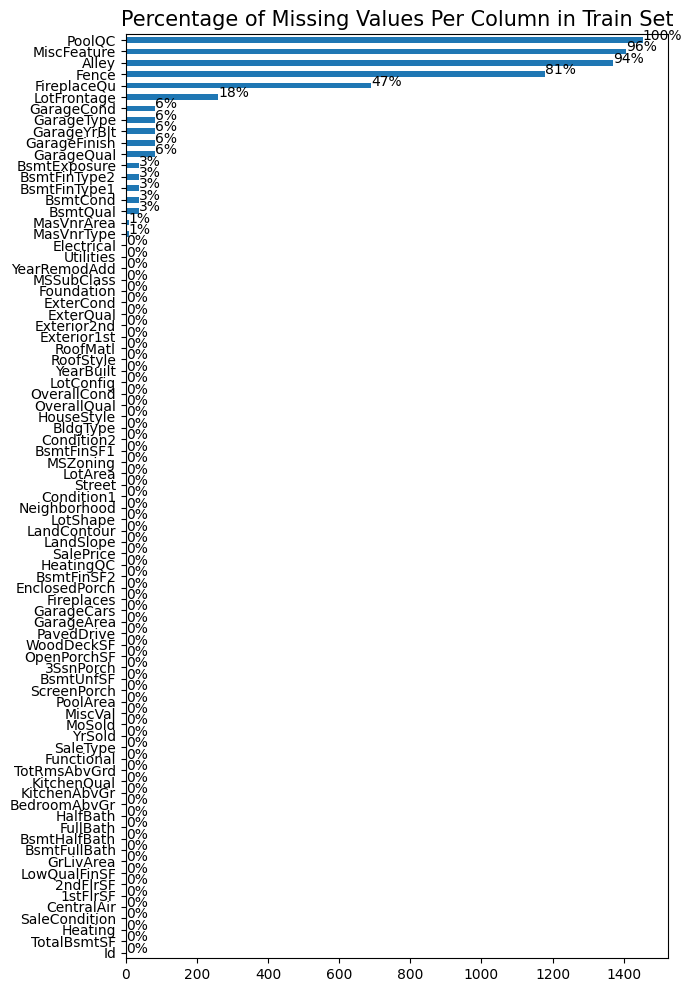

In [5]:
# Check if there any missing values in train set
ax = train_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (7, 12))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
plt.show()

## 1. Dropping columns with high missing values (more than 50%)

In [6]:
train_data.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [31]:
# list of features having missing values

features_with_nan=[features for features in train_data.columns if train_data[features].isnull().sum()>=1]

## 2. Visualizing the relationship between features with missing values and dependent variable

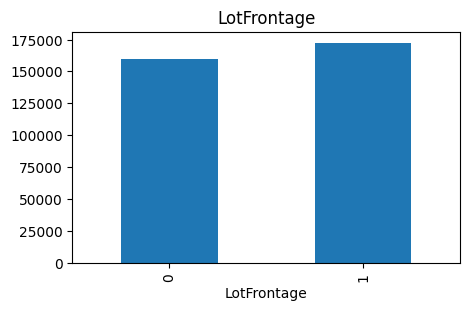

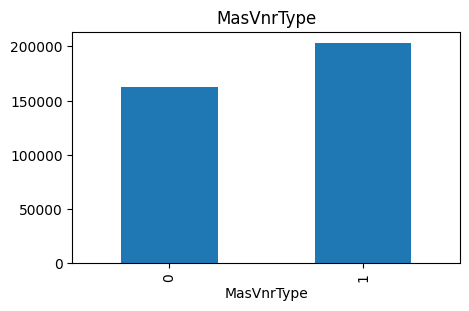

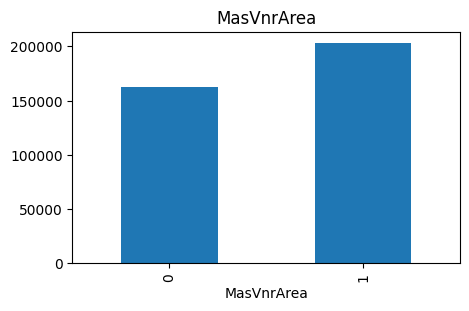

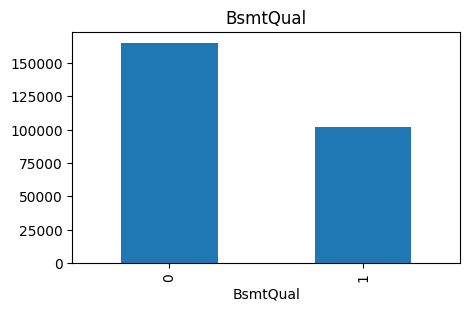

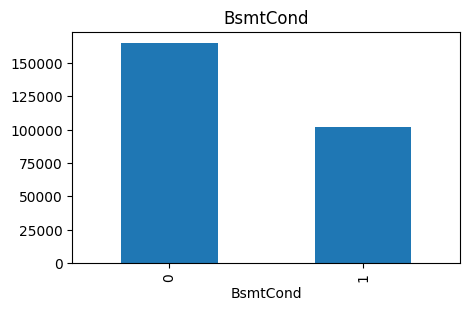

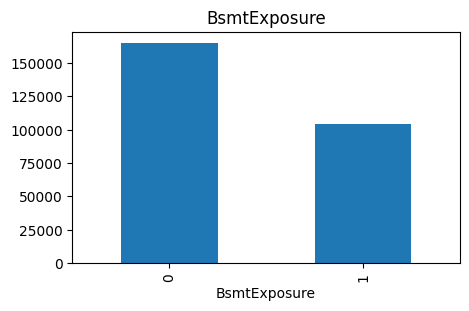

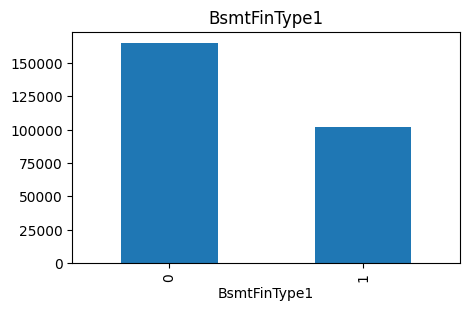

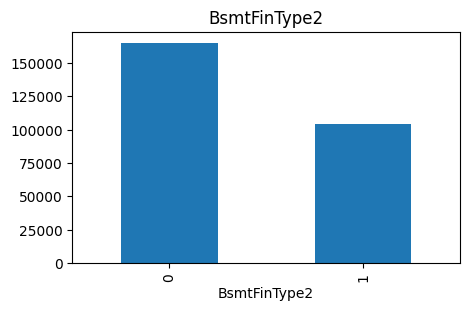

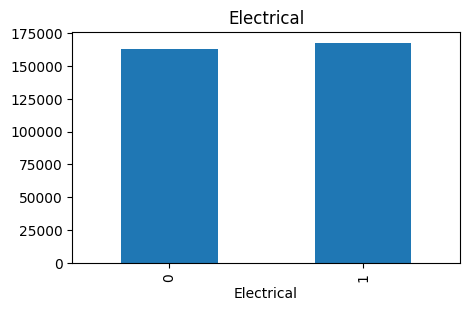

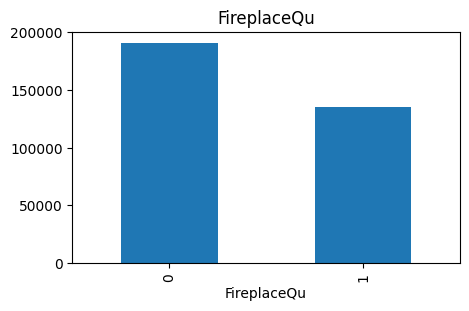

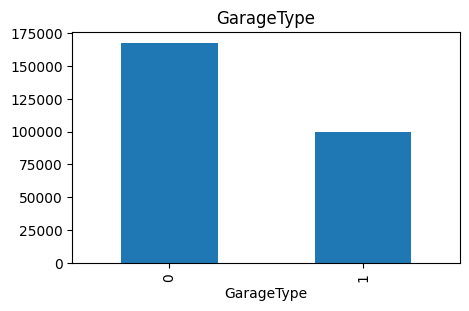

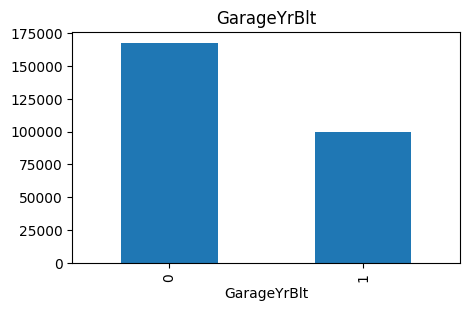

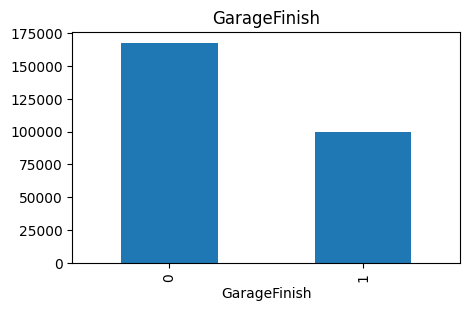

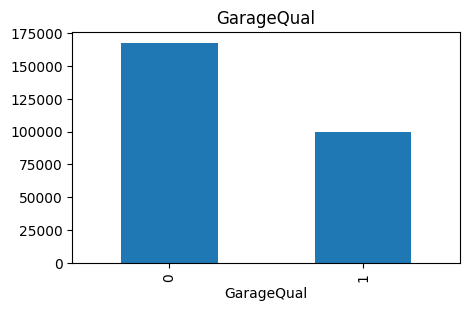

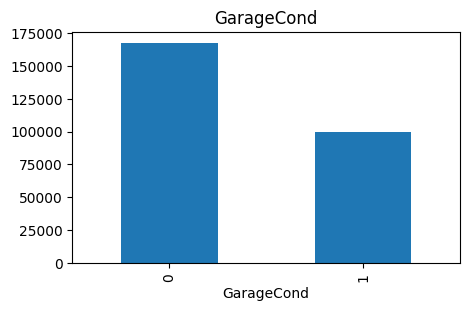

In [8]:
for feature in features_with_nan:
    df=train_data.copy()
    df[feature] = np.where(df[feature].isnull(), 1, 0)
    df.groupby(feature)['SalePrice'].median().plot.bar(figsize=(5,3))
    plt.title(feature)
    plt.show()

### So the missing values have considerable dependancy

# Numerical Features

In [30]:
num_features=[feature for feature in train_data.columns if train_data[feature].dtypes!='O']
print('Number of numerical vairables are:', len(num_features))

train_data[num_features].head()

Number of numerical vairables are: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Handling datetime variables

In [11]:
# Datetime features

year_feature=[feature for feature in num_features if 'Yr' in feature or 'Year' in feature]

# Number of unique values in Datetime features

for feature in year_feature:
    print(feature, train_data[feature].nunique())

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 97
YrSold 5


## 1. Visualizing the relationship between datetime features and sales price

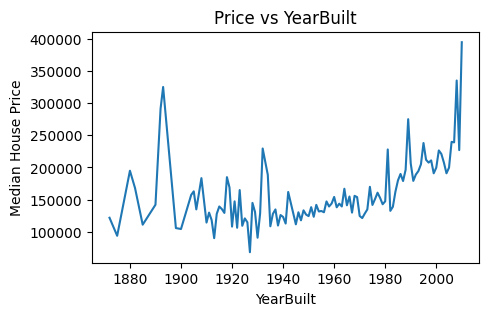

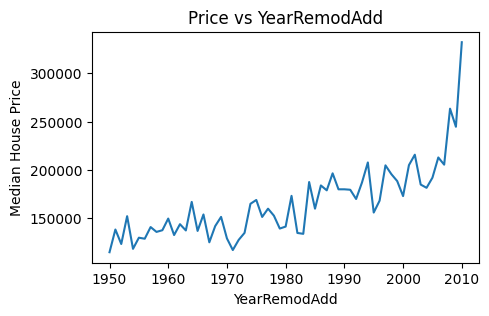

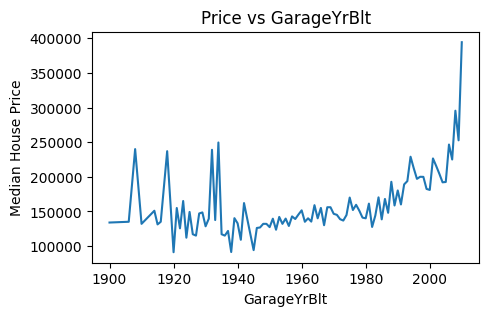

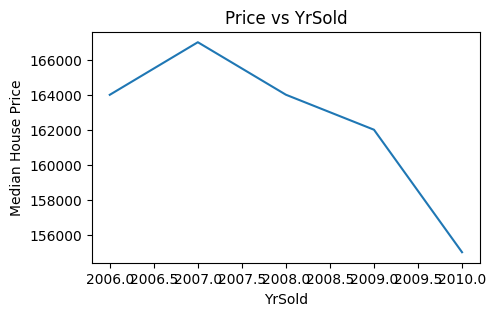

In [12]:
# check relation between date time variables and salesprice
for feature in year_feature:
    train_data.groupby(feature)['SalePrice'].median().plot(figsize=(5,3))
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title('Price vs '+ feature)
    plt.show()

## 1. Discrete numberical variables

In [13]:
disc_feature=[feature for feature in num_features if len(train_data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(disc_feature)))

Discrete Variables Count: 17


In [15]:
train_data[disc_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


## Visualizing the relationship between discrete numerical features and sales price

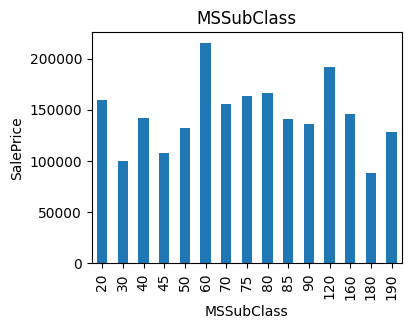

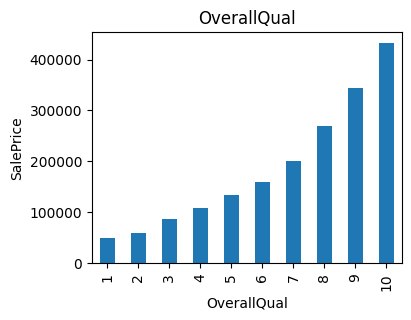

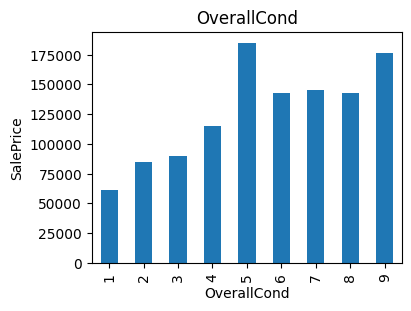

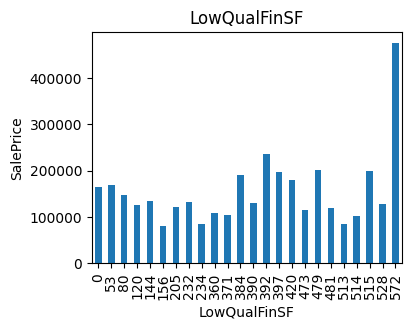

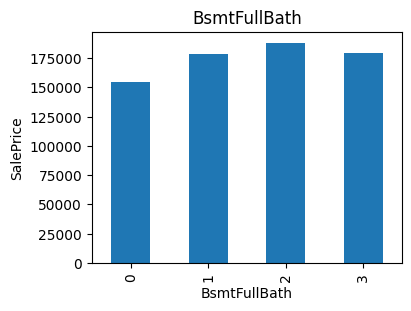

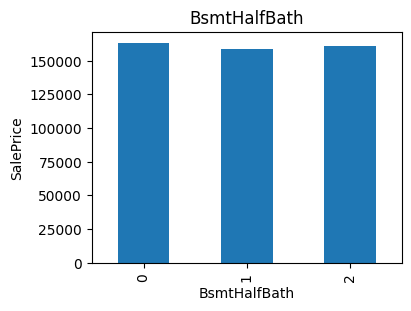

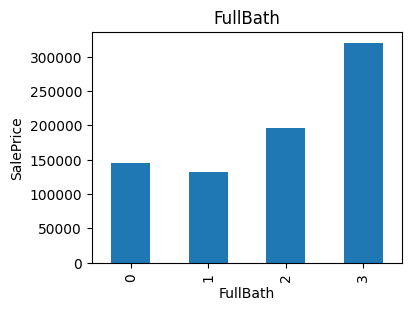

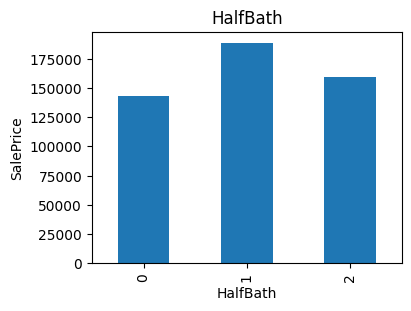

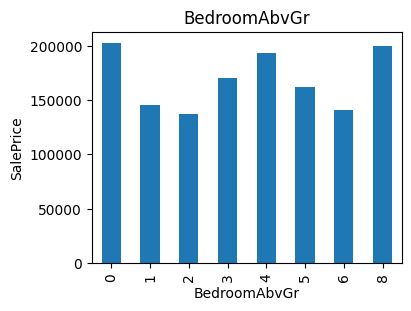

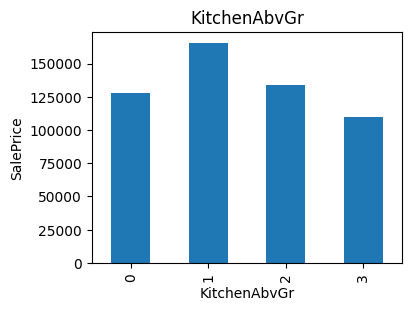

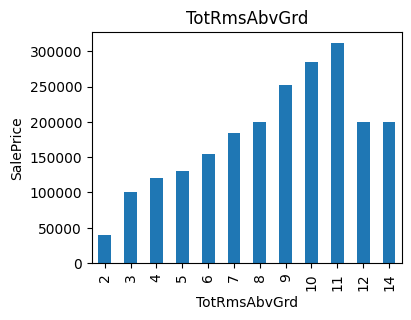

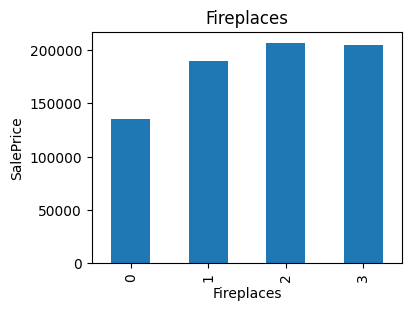

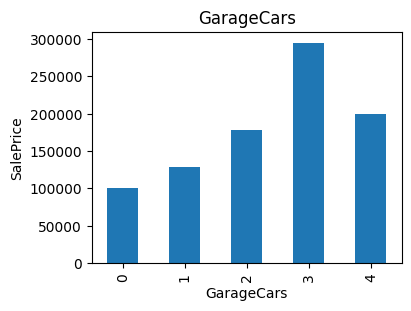

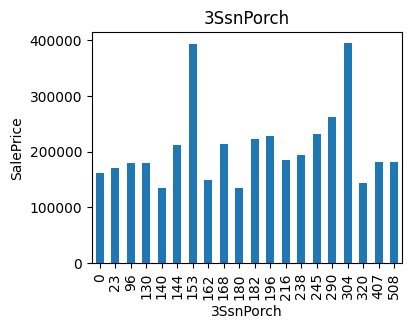

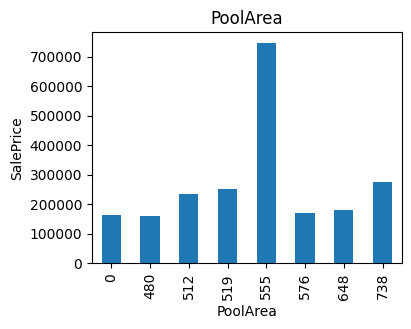

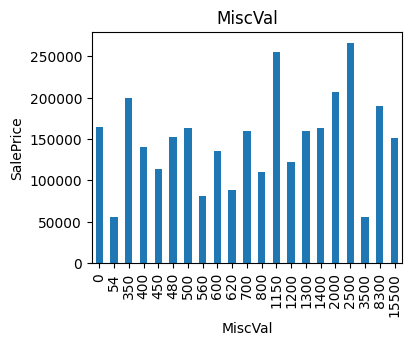

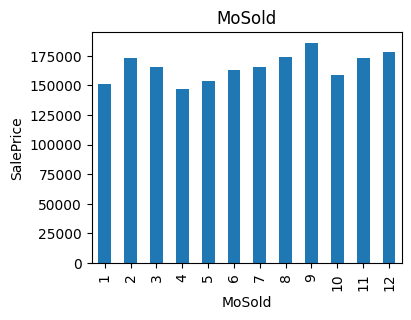

In [16]:
for feature in disc_feature:
    data1=train_data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar(figsize=(4,3))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## 2. Continuous numerical features

In [17]:
cont_feature=[feature for feature in num_features if feature not in disc_feature+year_feature+['Id']]
print("Continuous Variables Count: {}".format(len(cont_feature)))

Continuous Variables Count: 16


## Visualizing the relationship between continuous numerical features with sales price

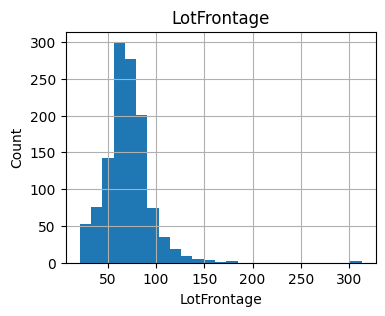

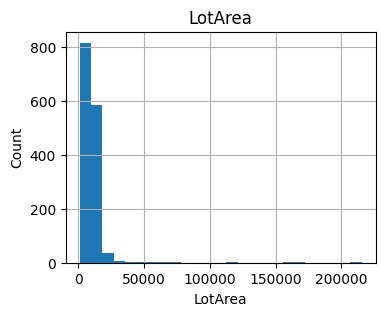

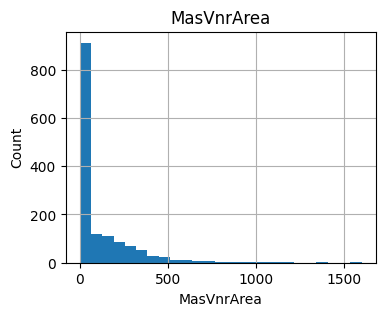

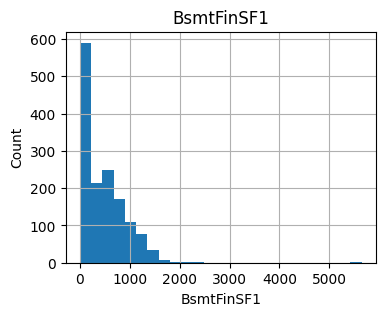

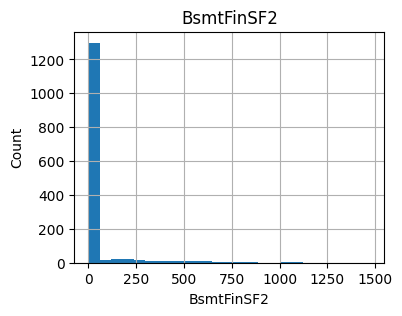

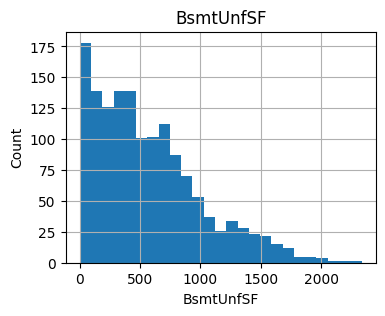

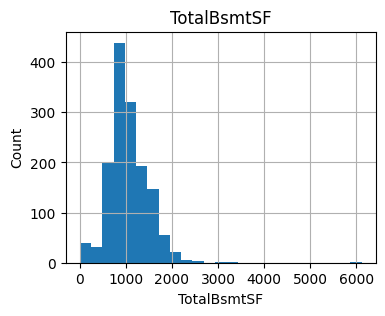

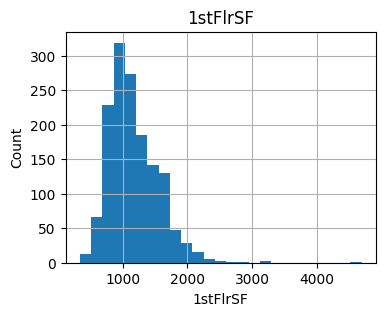

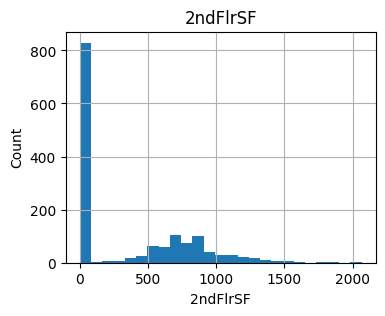

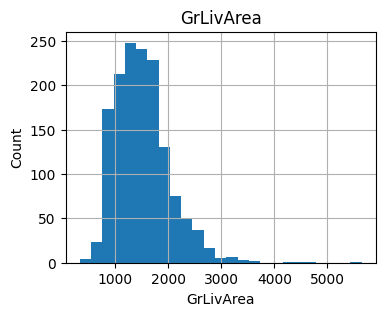

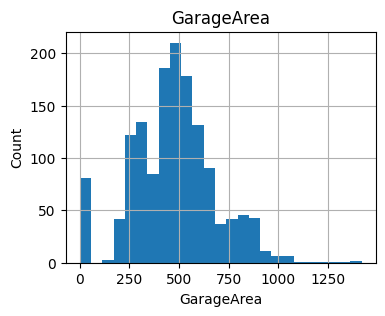

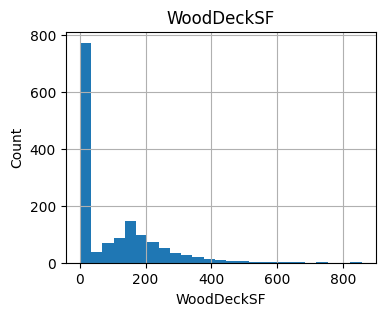

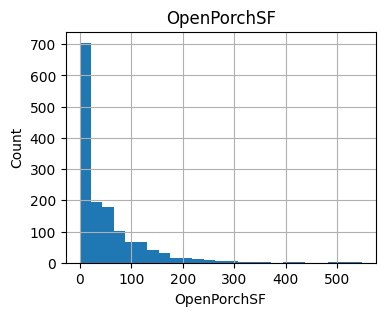

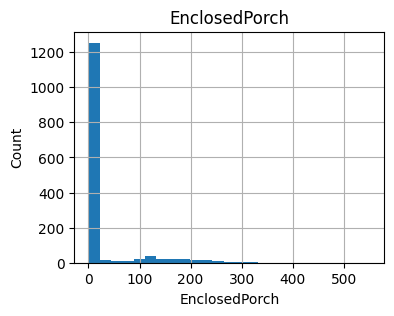

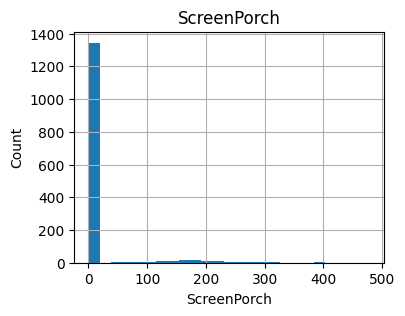

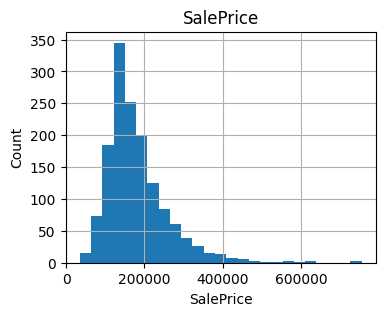

In [18]:
for feature in cont_feature:
    data1=train_data.copy()
    data1[feature].hist(bins=25,figsize=(4,3))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Some of the continuous numerical features are skewed 

# Handling Skewness

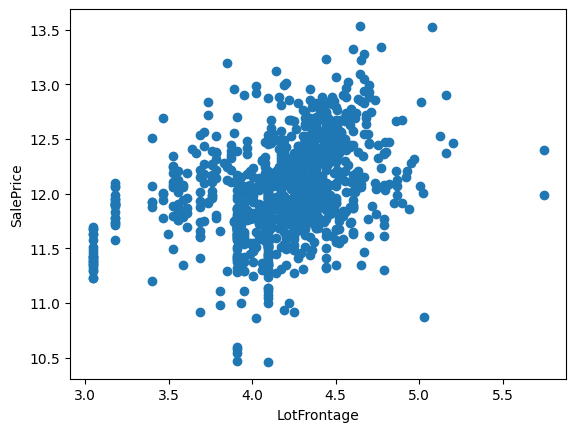

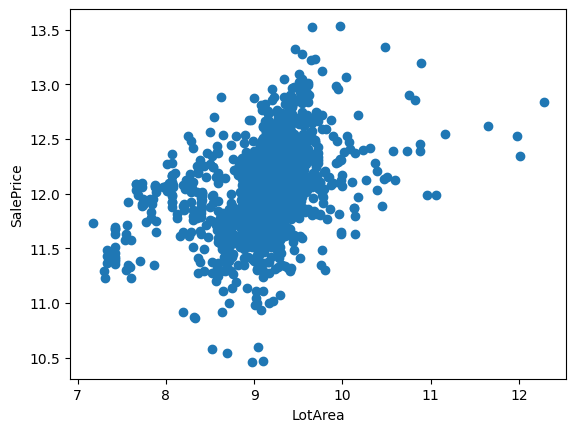

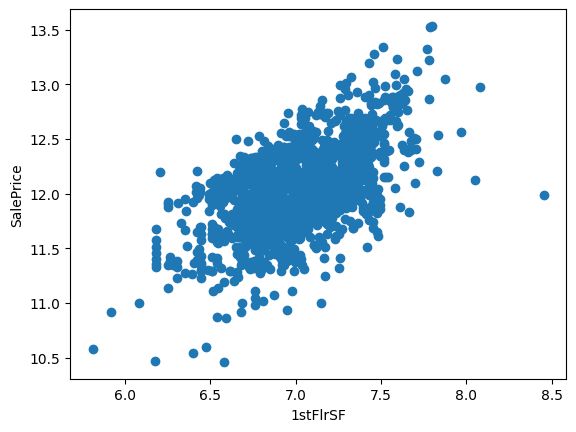

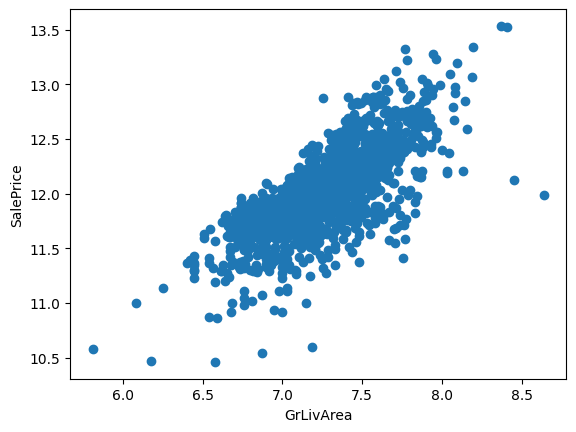

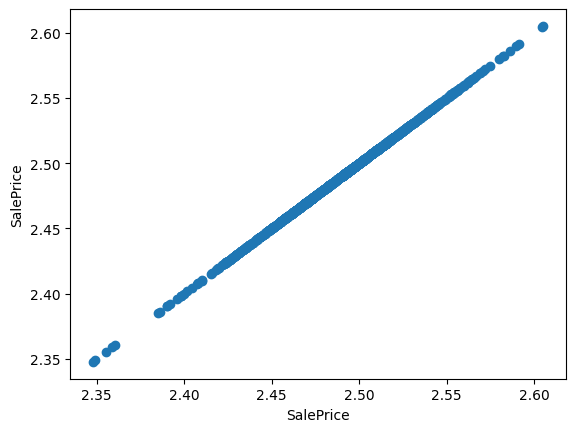

In [19]:
# log transformation 

for feature in cont_feature:
    df=train_data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['SalePrice']=np.log(df['SalePrice'])
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Outliers

## Outliers in continuous numerical features

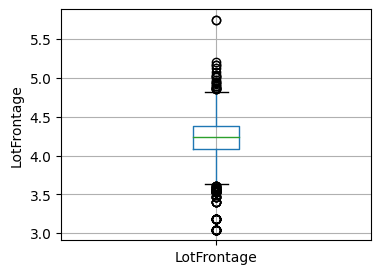

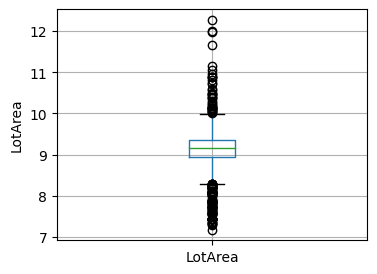

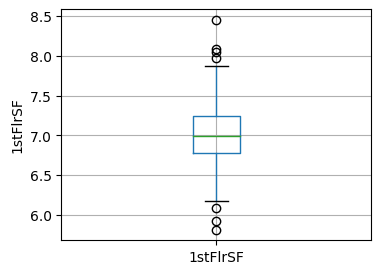

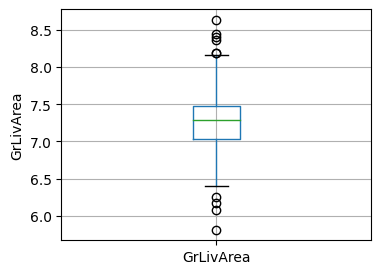

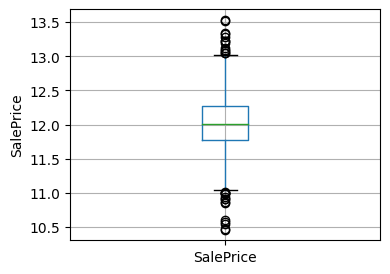

In [20]:
for feature in cont_feature:
    df=train_data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature,figsize=(4,3))
        plt.ylabel(feature)
        plt.show()

# Categorical Variables

In [21]:
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes=='O']
print("Categorical Variables Count: {}".format(len(categorical_features)))

Categorical Variables Count: 39


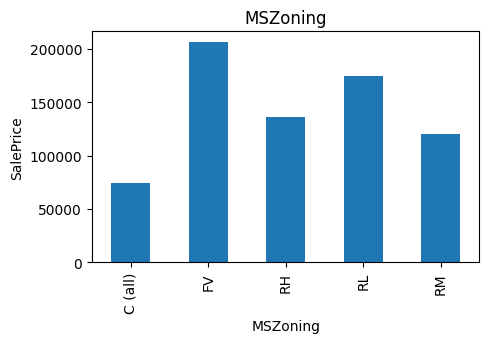

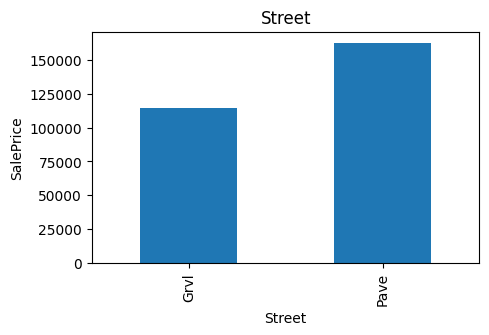

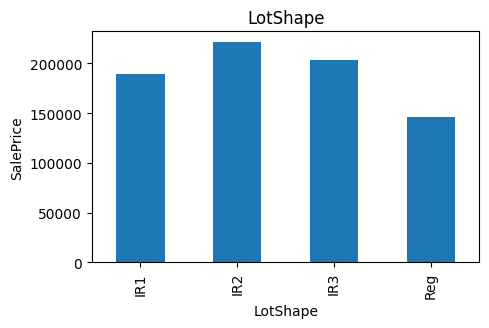

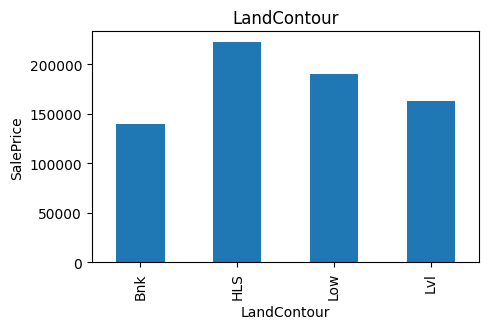

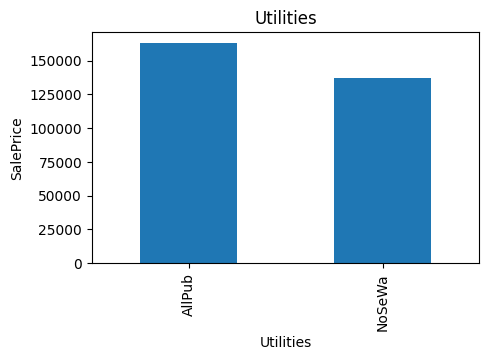

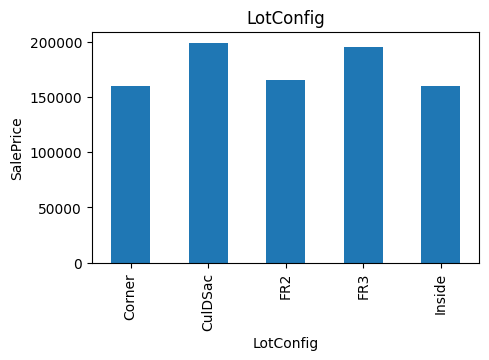

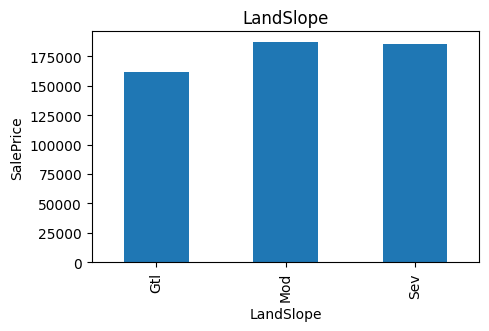

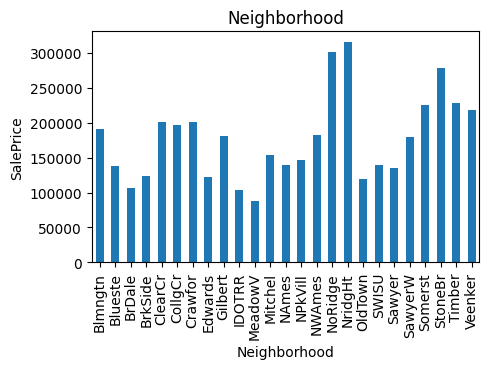

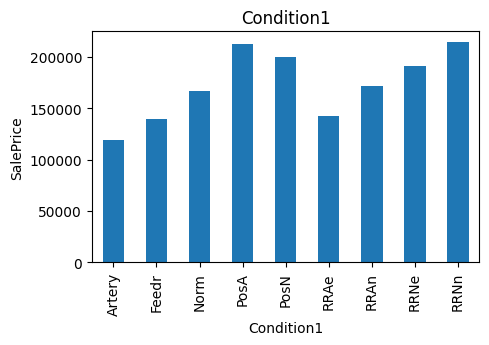

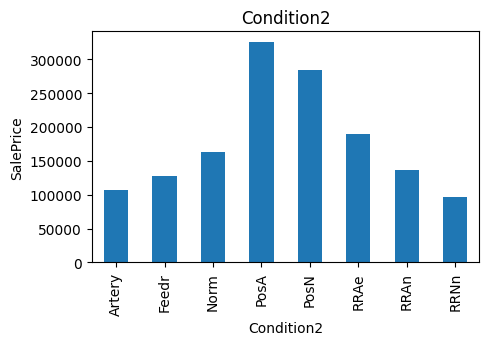

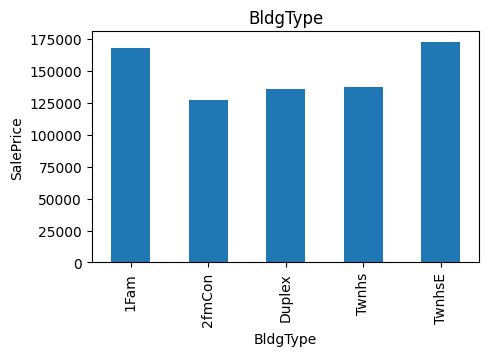

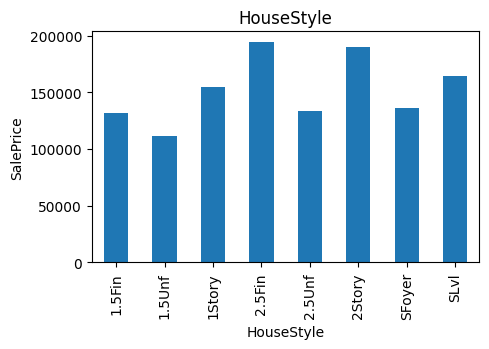

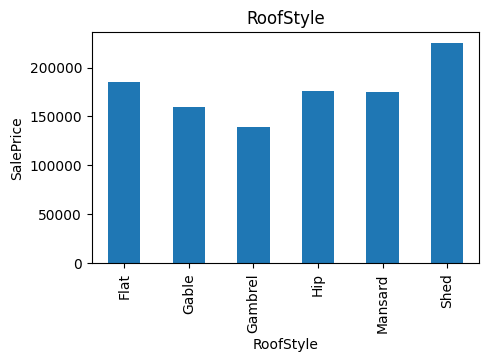

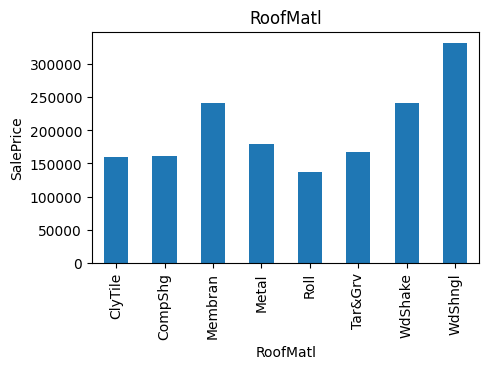

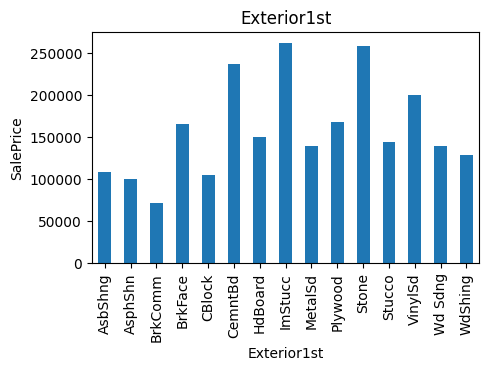

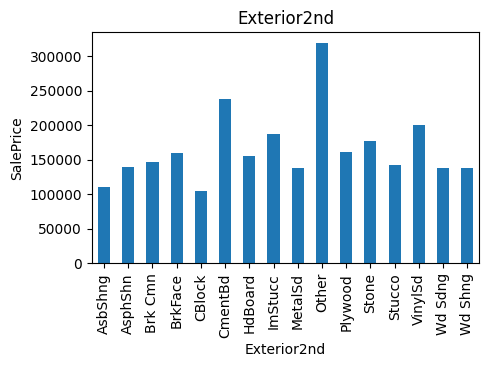

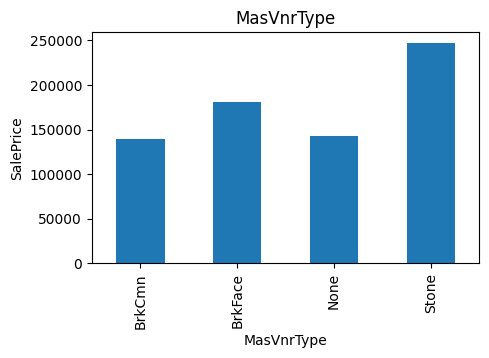

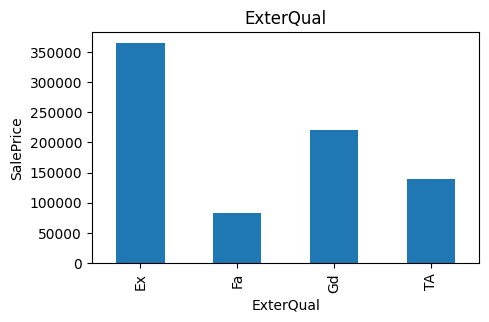

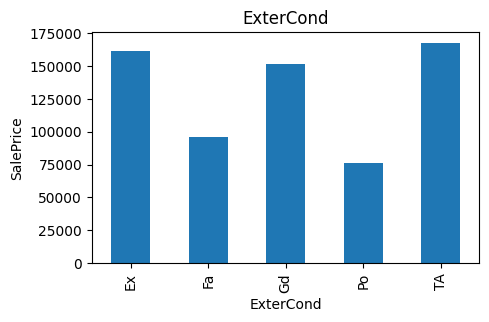

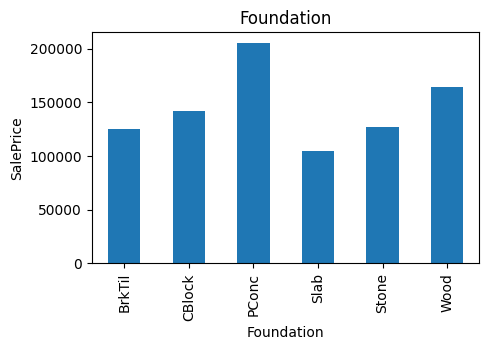

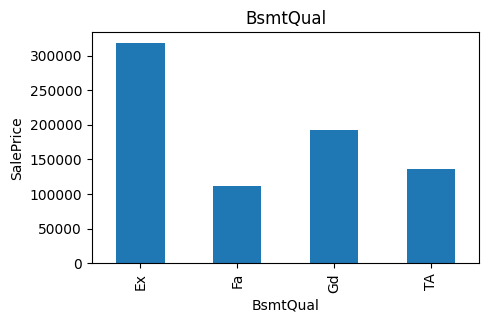

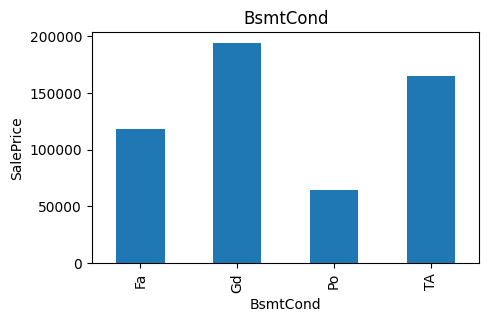

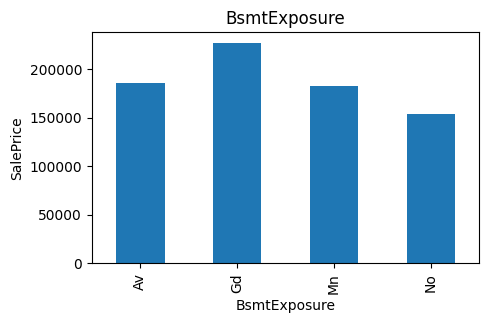

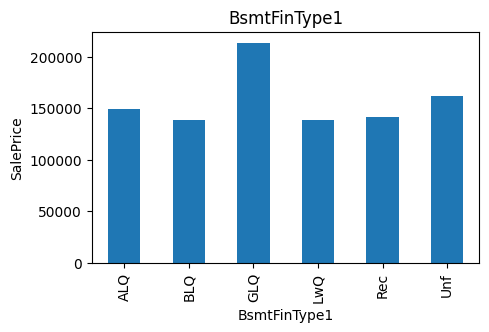

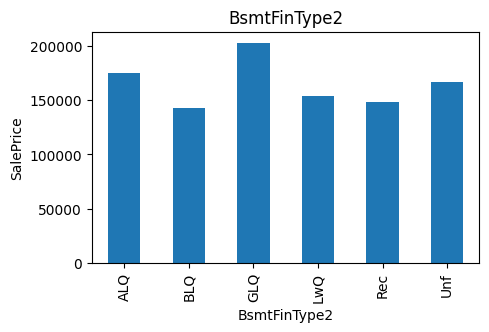

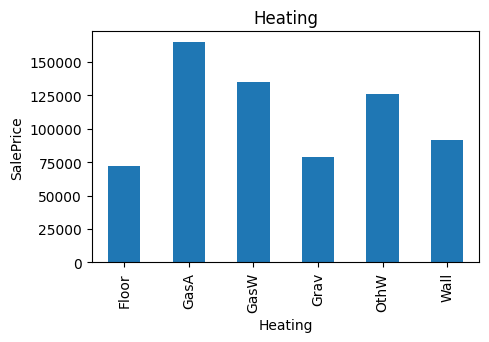

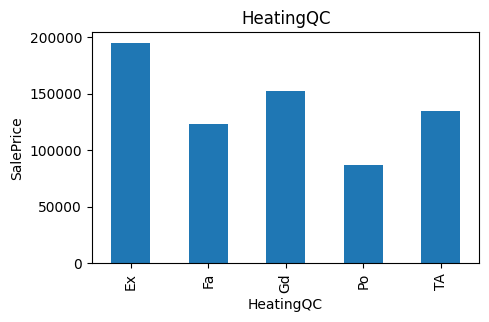

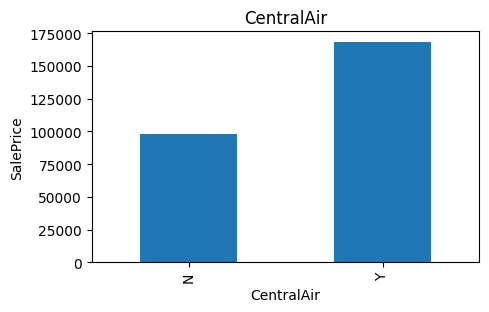

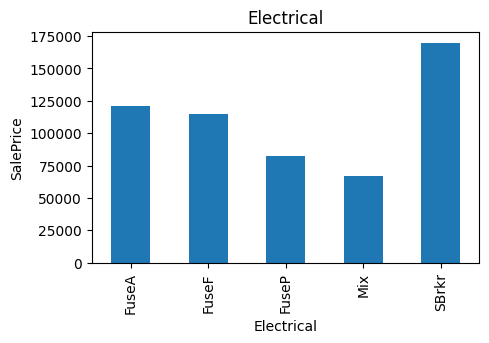

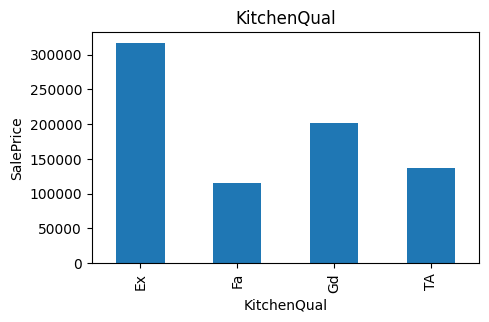

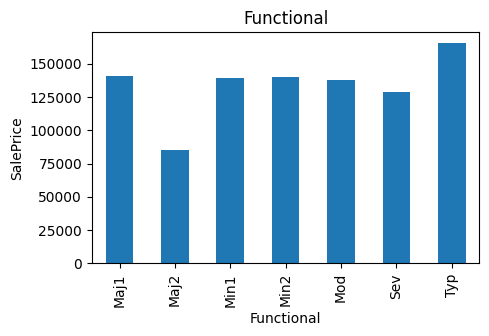

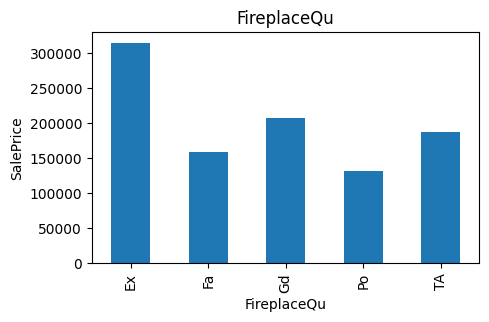

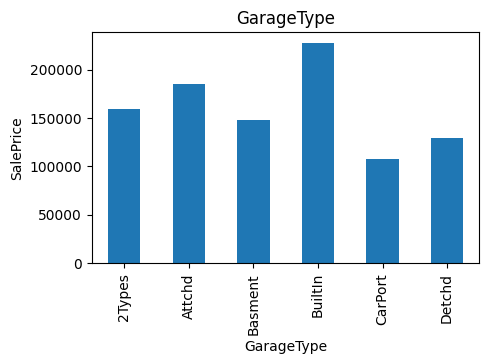

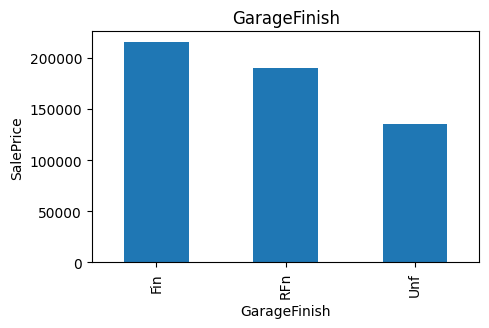

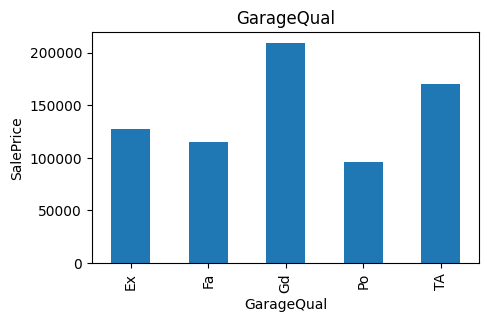

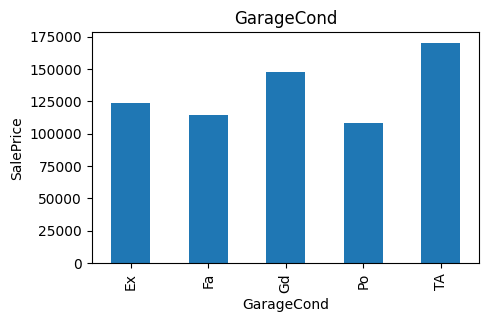

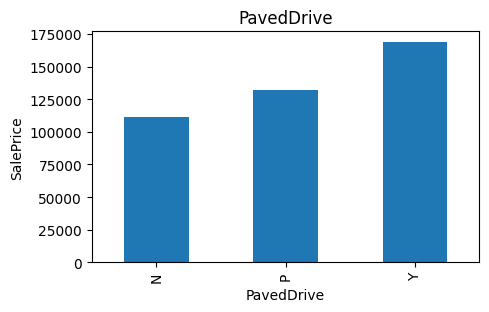

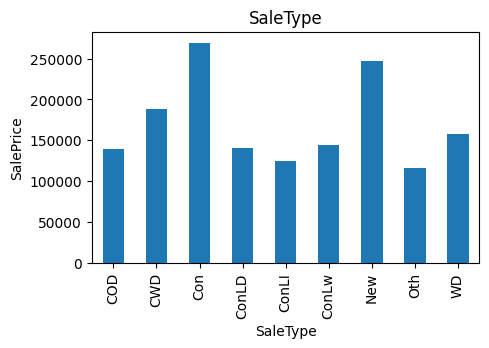

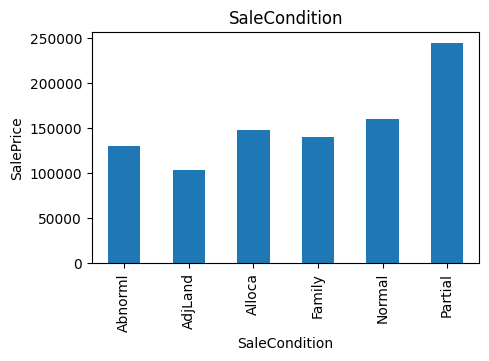

In [22]:
for feature in categorical_features:
    data1=train_data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar(figsize=(5,3))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

In [23]:
# remove the features with high missing values like train data

test_data.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [24]:
print(train_data.shape)
print(test_data.shape)

(1460, 77)
(1459, 76)


In [25]:
# combine the train data and test data to fill the missing values

data=pd.concat([train_data,test_data],axis=0)
print(data.shape)

(2919, 77)


# 1. Handling missing values

19


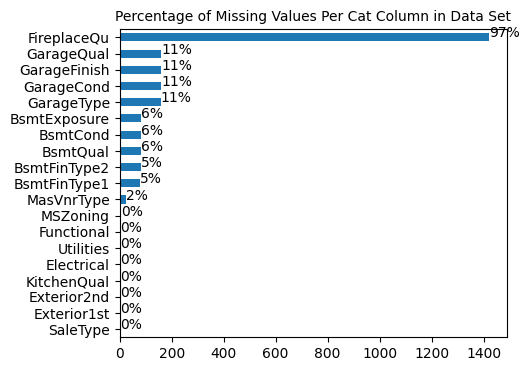

In [27]:
# Categorical features with missing values

features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtypes=='O' and feature not in ['SalePrice']]
print(len(features_nan))

# percentage of nan values in categorical features

ax = data[features_nan].isna().sum().sort_values().plot(kind = 'barh', figsize = (5, 4))
plt.title('Percentage of Missing Values Per Cat Column in Data Set', fontdict={'size':10})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
plt.show()

11


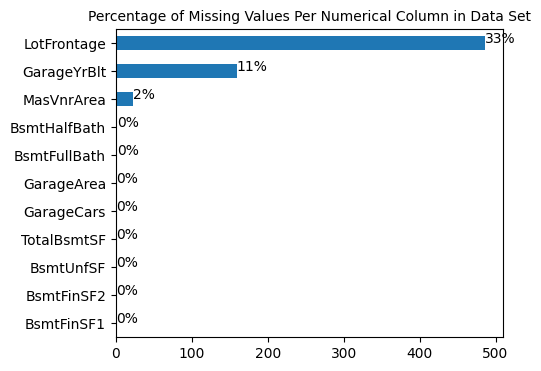

In [33]:
# numerical features with missing values

numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtypes!='O' and feature not in ['SalePrice']]
print(len(numerical_with_nan))

# percentage of nan values in numerical variables

ax = data[numerical_with_nan].isna().sum().sort_values().plot(kind = 'barh', figsize = (5, 4))
plt.title('Percentage of Missing Values Per Numerical Column in Data Set', fontdict={'size':10})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
plt.show()

## Handling missing values of categorical features

In [34]:
# Fill the missing values with a new category 'missing'

data[features_nan]=data[features_nan].fillna('Missing')
data[features_nan].isnull().sum() # check presence of missing values

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

## Handling missing values of numerical features

In [35]:
# create a new feature to capture nan values

for feature in numerical_with_nan:
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    
# replacing nan values with median as the three features has lot of outliers

data[numerical_with_nan]=data[numerical_with_nan].fillna(data[numerical_with_nan].median())
data[numerical_with_nan].isnull().sum() # check the presence of missing values

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2919 non-null   int64  
 1   MSSubClass       2919 non-null   int64  
 2   MSZoning         2919 non-null   object 
 3   LotFrontage      2919 non-null   float64
 4   LotArea          2919 non-null   int64  
 5   Street           2919 non-null   object 
 6   LotShape         2919 non-null   object 
 7   LandContour      2919 non-null   object 
 8   Utilities        2919 non-null   object 
 9   LotConfig        2919 non-null   object 
 10  LandSlope        2919 non-null   object 
 11  Neighborhood     2919 non-null   object 
 12  Condition1       2919 non-null   object 
 13  Condition2       2919 non-null   object 
 14  BldgType         2919 non-null   object 
 15  HouseStyle       2919 non-null   object 
 16  OverallQual      2919 non-null   int64  
 17  OverallCond   

### All the missing values are handled

# Handling Rare Categorical variables

In [37]:
# remove categorical variables that are present less than 1% of the observations

for feature in categorical_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    #print(temp)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

# 2. Encoding categorical variables

In [38]:
# encoding categorical variables with more number of categories

label=[]
cat_features=[]
for feature in categorical_features:
    if data[feature].nunique()>=5:
        print(feature, data[feature].nunique())
        label.append(feature)
    else: cat_features.append(feature)
len(label)

LotConfig 5
Neighborhood 17
BldgType 5
HouseStyle 6
Exterior1st 8
Exterior2nd 8
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 6
HeatingQC 5
KitchenQual 5
FireplaceQu 5
GarageType 5


15

### Encoding cateorical variables based on count, highest count gets the maximum rank

In [39]:
for i in label:
    dic=data[i].value_counts().to_dict()
    list1=np.arange(len(dic.values()),0,-1)
    dic2=dict(zip(list(dic.keys()),list1))
    data[i]=data[i].replace(dic2)

In [40]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,5,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,2,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,5,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,4,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,2,...,0,0,0,0,0,0,0,0,0,0


### we can also use target guided mean encoding 

In [48]:
# for feature in categorical_features:
#     labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
#     labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
#     data[feature]=data[feature].map(labels_ordered)

## One Hot Encoding for categorical variables

In [41]:
data_num=data.drop(cat_features,axis=1)
data_cat=pd.get_dummies(data[cat_features],drop_first=True)
data=pd.concat([data_num,data_cat],axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCond_Rare_var,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,1,60,65.0,8450,5,15,5,5,7,5,...,0,1,0,1,0,0,1,1,0,0
1,2,20,80.0,9600,2,16,5,6,6,8,...,0,1,0,1,0,0,1,1,0,0
2,3,60,68.0,11250,5,15,5,5,7,5,...,0,1,0,1,0,0,1,1,0,0
3,4,70,60.0,9550,4,4,5,5,7,5,...,0,1,0,1,0,0,1,0,0,0
4,5,60,84.0,14260,2,1,5,5,8,5,...,0,1,0,1,0,0,1,1,0,0


In [42]:
data =data.loc[:,~data.columns.duplicated()] # check for duplicate columns
print(data.shape)

(2919, 119)


## Log Transformation

In [43]:
## taking the skewed features
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in num_features:
    data[feature]=np.log(data[feature])

# 3. Scaling the data

In [44]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [45]:
final_df = pd.concat([data[[ 'Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],axis=1)

# Model Training

## Test Train Split

In [46]:
df_Train=final_df.iloc[0:1314,:]
df_valid=final_df.iloc[1314:1460,:]
df_Test=final_df.iloc[1460:,:]

print(df_Train.shape,df_valid.shape,df_Test.shape)

(1314, 119) (146, 119) (1459, 119)


In [47]:
# Drop Sale Price from test data

df_Test.drop(['Id','SalePrice'],axis=1,inplace=True)

C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
# Log transformation of target variable

df_Train['SalePrice']=np.log(df_Train['SalePrice'])
df_valid['SalePrice']=np.log(df_valid['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
X_train=df_Train.drop(['Id','SalePrice'],axis=1)
y_train=df_Train['SalePrice']
    

y_valid=df_valid['SalePrice']
x_valid=df_valid.drop(['Id','SalePrice'],axis=1)

## Model Selection

### Decision Trees

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_depth=6,random_state=42)
tree_reg.fit(X_train,y_train)
y_pred_valid1=tree_reg.predict(x_valid)
y_test1=tree_reg.predict(df_Test)

print('RMSE:',np.sqrt(mean_squared_error(y_valid,y_pred_valid1)))

RMSE: 0.19534932975268607


In [51]:
def rmse(true,pred):
    return np.sqrt(mean_squared_error(y_valid,y_pred_valid1))

In [61]:
# Parameter tuning

tree_reg = DecisionTreeRegressor(random_state=42)
min_val_error = float("inf")
error_going_up = 0
best_depth=1
for max_depth in range(1, 100):
    tree_reg.max_depth = max_depth
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(x_valid)
    val_error = rmse(y_valid, y_pred)
    #print(val_error,min_val_error,tree_reg.max_depth)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
        best_depth=tree_reg.max_depth
    else:
        error_going_up += 1
        if error_going_up == 10:
            break  # early stopping

### Extra Trees Regressor

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(max_depth=9, min_samples_leaf=35, min_samples_split=25,
                    n_estimators=55, n_jobs=4)
etr.fit(X_train,y_train)
y_v_etr=etr.predict(x_valid)
y_t_etr=etr.predict(df_Test)
rmse(y_v_etr,y_valid)

0.19534932975268607

### Extra Trees- Hyper Parameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [64]:
n_estimators = [30,35, 40,45, 50,55, 60,65, 70,75]
max_depth = [1,2, 3, 4, 5, 6,7,8,9,10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    }

In [65]:
from sklearn.model_selection import RandomizedSearchCV 
random_cv = RandomizedSearchCV(estimator=etr,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [66]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=ExtraTreesRegressor(max_depth=9,
                                                 min_samples_leaf=35,
                                                 min_samples_split=25,
                                                 n_estimators=55, n_jobs=4),
                   n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [30, 35, 40, 45, 50, 55,
                                                         60, 65, 70, 75]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [67]:
random_cv.best_estimator_

ExtraTreesRegressor(max_depth=8, min_samples_leaf=35, min_samples_split=25,
                    n_estimators=30, n_jobs=4)

### Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=67, learning_rate=0.16, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_test2=gbrt.predict(df_Test)
    
y_pred_valid2=gbrt.predict(x_valid)
rmse(y_pred_valid2,y_valid)

0.19534932975268607

In [69]:
n_estimators = [30,35, 40,45, 50,55, 60,65, 70,75]
max_depth = [1,2, 3, 4, 5, 6,7,8,9,10]
learning_rate=[0.1,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    }

In [70]:
from sklearn.model_selection import RandomizedSearchCV 
random_cv = RandomizedSearchCV(estimator=gbrt,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [71]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=GradientBoostingRegressor(learning_rate=0.16,
                                                       max_depth=4,
                                                       n_estimators=67,
                                                       random_state=42),
                   n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.1, 0.15, 0.16, 0.17,
                                                          0.18, 0.19, 0.2, 0.21,
                                                          0.22, 0.23],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [30, 35, 40, 45, 50, 55,
                                                         60, 65, 70, 75]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', ve

In [72]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.15, max_depth=4, n_estimators=75,
                          random_state=42)

### XGBoost

In [73]:
import xgboost
regressor=xgboost.XGBRegressor(max_depth=3,n_estimators=900,booster='gbtree',learning_rate=0.1,min_child_weight=1,base_score=0.25)
regressor.fit(X_train,y_train)

[23:02:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, n_estimators=900)

In [74]:
y_t_xg=regressor.predict(df_Test)
    
y_p_xg=regressor.predict(x_valid)
rmse(y_p_xg,y_valid)

0.19534932975268607

In [75]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [76]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [77]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 5,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [78]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[23:13:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.25, n_estimators=900),
                   n_iter=50, n_jobs=5,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [79]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

### Neural Networks

In [80]:
import tensorflow
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [81]:
classifier = Sequential()

classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='sigmoid',input_dim = 162))

# classifier.add(Dense(output_dim = 75, init = 'he_uniform',activation='relu'))

# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
#######
# classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# classifier.add(Dense(output_dim = 75, init = 'he_uniform',activation='relu'))
# classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))

#######
classifier.add(Dense(output_dim = 2, init = 'he_uniform'))

classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

model_history=classifier.fit(X_train.values, y_train.values,validation_split=0, batch_size = 20, nb_epoch =2500)

TypeError: __init__() missing 1 required positional argument: 'units'

In [ ]:
x_valid=np.array(x_valid)
pred=classifier.predict(x_valid)
pred=np.rint(pred)
for i in range(0,len(pred)):
    if pred[i]<=0:
        pred[i]=0
rmse(pred[:,0],y_valid)
a=np.array(df_Test)
ann_pred=classifier.predict(a)

## Saving results

In [ ]:
y_t_xg=pd.DataFrame(y_t_xg)
y_t_xg.to_csv('y_pred_xgb.csv',index=True)